<a href="https://colab.research.google.com/github/Robots-Vision/KNNExamples/blob/master/Mushrooms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as scp
import warnings
warnings.filterwarnings("ignore")

from google.colab import files

uploaded = files.upload()

Saving mushrooms.csv to mushrooms.csv


In [4]:
# Utilizando a biblioteca pandas para importação dos dados
dataset = "./mushrooms.csv"

df = pd.read_csv(dataset, engine='python', sep=',')

In [5]:
# Verigicando dados iniciais do dataset importado
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [7]:
# Entendendo o dataset, colunas, data types, quantidade de tegistros por coluna 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [8]:
# Verificando detalhes estatísticos do dataset
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


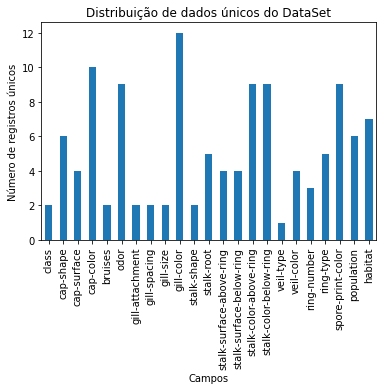

In [9]:
def distribuicao(data):
  '''
    Esta função exibirá a quantidade de registros únicos para cada coluna
    existente no dataset
    
    dataframe -> Histogram
  '''
  # Calculando valores unicos para cada label: num_unique_labels
  num_unique_labels = data.apply(pd.Series.nunique)

  # plotando valores
  num_unique_labels.plot(kind='bar')

  # Nomeando os eixos
  plt.xlabel('Campos')
  plt.ylabel('Número de registros únicos')
  plt.title('Distribuição de dados únicos do DataSet')

  # Exibindo gráfico
  plt.show()

distribuicao(df)

Cogumelos Comestiveis:  4208
Cogumelos Venenosos:  3916


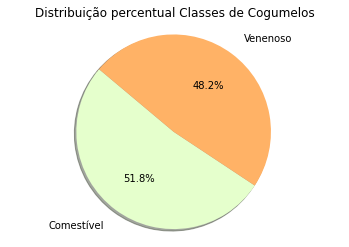

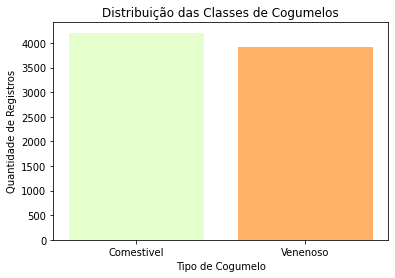

In [11]:
# Contando o número de registros dos tipos 'e' e 'p' da coluna 'class'(Comestível = e, Venenoso = p)
e = pd.value_counts(df['class']) [0]
p = pd.value_counts(df['class']) [1]

tam = len(df)

print('Cogumelos Comestiveis: ', e)
print('Cogumelos Venenosos: ', p)

# Cria uma estrutura de dados comum no pandas. Em outras palavras uma tabela de dados
pie = pd.DataFrame([['Comestivel', e], ['Venenoso', p]], columns=['Tipo', 'Quantidade'])

def pie_chart(data, col1, col2, title):
  labels = { 'Comestível': 0, 'Venenoso': 1 }
  sizes = data[col2]
  colors = ['#e5ffcc', '#ffb266']

  plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle= 140, labeldistance= 1.2)
  plt.title( title )

  plt.axis('equal')
  plt.show()

pie_chart(pie, 'Tipo', 'Quantidade', 'Distribuição percentual Classes de Cogumelos')

plt.bar(pie.Tipo, pie.Quantidade, color = ['#e5ffcc', '#ffb266'])
plt.title("Distribuição das Classes de Cogumelos")
plt.xlabel('Tipo de Cogumelo')
plt.ylabel('Quantidade de Registros')
plt.show()

In [12]:
# X = colunas de informação, variáveis independentes
# X recebe todo o DataFrame menos a coluna 'class'. axis significa o tipo ou o eixo do dado a ser removido, se for 1 vai ser uma coluna e se for 0 vai ser uma label em específico
X = df.drop('class', axis=1)

# y = Variável dependente, a qual será utilizada para classificar os dados
# Recebe só a coluna 'class'
y = df['class']

In [13]:
# Verificando se C está com a coluna class(porque não pode estar)
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [15]:
# Como o KNN utiliza medidas de distância para analisar a similaridade dos registros de cada classe, precisamos transformar as labels em números.
# OneHotEncoder gera novas colunas com valor 0 ou 1, aonde 1 representa a ocorrência daquela caracteristica e 0 a não ocorrência. 
#Ex.: A coluna cap-color com registros n,y,w e g, após passar pelo OneHotEncoder ficariam como cap-color-n, cap-color-y, cap-color-w, suas linhas serão os valores 1 (é desta cor e 0 não é desta cor).

#Importando o encoder para transformar as labels em chaves numéricas
from sklearn.preprocessing import OneHotEncoder

Oht_enc = OneHotEncoder()
X = pd.DataFrame(Oht_enc.fit_transform(X).A)

In [16]:
X.shape

(8124, 117)

In [18]:
# Nesta fase separamos o conjunto de dados em Treinamento e Teste, definindo o percentual que utilizaremos para teste e para treino do modelo

from sklearn.model_selection import train_test_split

# Retorna 70% de X(DataFrame sem o 'class') para treino e 30% de X para teste
# Retorna 70% de y(coluna 'class' separada) para treino e 30% de y para teste
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [23]:
# Etapa importante que irá reduzir a escala numérica das colunas, para que todas estejam dentro de uma mesma escala de valor.
# Se houverem medidas com escalas de valor muito diferentes a distância calculada pelo algorítimo será influênciada podendo gerar resultados errôneos. 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
# Agora iremos aplicar nossos dados ao algoritmo KNN
# Importando o modelo KNN
from sklearn.neighbors import KNeighborsClassifier

# Definindo o valor de visinhos
classifier = KNeighborsClassifier(n_neighbors=5)

# Treinando o modelo, com dados de treinamento
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [25]:
#### Prevendo os valores de Y para os dados de teste (X_test)
y_pred = classifier.predict(X_test)

In [26]:
# Analisando e validando os resultados obtidos
#Importnado métricas para validação do modelo
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Imprimindo matriz confusa
print('Matriz Confusa: ')
print(confusion_matrix(y_test, y_pred), "\n")

# Impriminfo o relatório de classificação
print("Relatório de classificação: \n", classification_report(y_test, y_pred))

# Importando o quão acurado(precisão) foi o modelo
print('Acurácia do modelo: ', accuracy_score(y_test, y_pred))

Matriz Confusa: 
[[1243   16]
 [ 174 1005]] 

Relatório de classificação: 
               precision    recall  f1-score   support

           e       0.88      0.99      0.93      1259
           p       0.98      0.85      0.91      1179

    accuracy                           0.92      2438
   macro avg       0.93      0.92      0.92      2438
weighted avg       0.93      0.92      0.92      2438

Acurácia do modelo:  0.9220672682526662


In [27]:
# Mas precisamos ter a maior precisão possivel para o nosso modelo
# Para isso vamos gerar um loop para achar o melhor número de visinhos

error = []

# Calculando error para o valor de K entre 1 e 40
for i in range(1, 10):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  pred_i = knn.predict(X_test)
  # np.mean(Retorna a média dos elementos desse array)
  error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

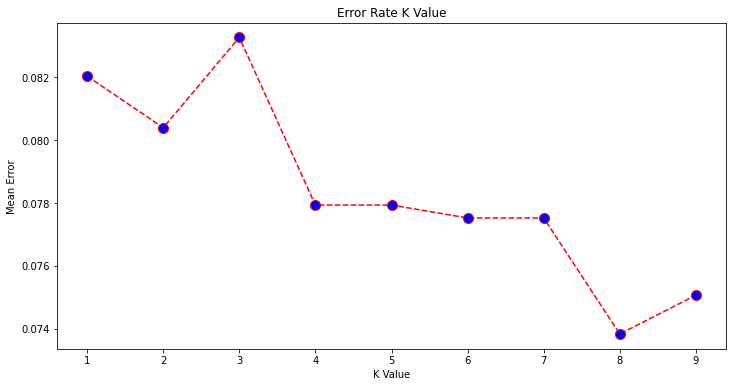

In [28]:
# Comparando o Error Rate gerado de valores K diferentes
plt.figure(figsize=(12, 6))
plt.plot(range(1, 10), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [33]:
# Aplicando melhor parâmetro para K encontrado
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 8)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [34]:
# Aplicando os valores de teste novamente
y_pred = classifier.predict(X_test)

In [36]:
# Importando métricas para validação do modelo
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Imprimindo a matriz confusa
print("Matriz Confusa> ")
print(confusion_matrix(y_test, y_pred), "\n")

# Imprimindo o relatório de classificação
print("Relatório de classificação: \n", classification_report(y_test, y_pred))

# Imprimindo o quão acurado foi o modelo
print('Acurácia do modelo: ', accuracy_score(y_test, y_pred))

Matriz Confusa> 
[[1257    2]
 [ 178 1001]] 

Relatório de classificação: 
               precision    recall  f1-score   support

           e       0.88      1.00      0.93      1259
           p       1.00      0.85      0.92      1179

    accuracy                           0.93      2438
   macro avg       0.94      0.92      0.93      2438
weighted avg       0.93      0.93      0.93      2438

Acurácia do modelo:  0.92616899097621
